## SMART STORE: EMPOWERING FARMERS AND DEPARTMENTAL STORE OWNERS THROUGH AI-DRIVEN RETAIL MANAGEMENT

## Author: J Suganya

In [166]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler , MinMaxScaler , LabelEncoder

import statsmodels.api as sm

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression , LinearRegression

from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score , accuracy_score

from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [123]:
df=pd.read_csv('target_groceries_data.csv')
df.head(5)

,title,url,brand,main_image,sku,description,raw_description,gtin13,currency,price,...,sub_category_2,sub_category_3,images,raw_specifications,specifications,highlights,raw_highlights,uniq_id,mg date,expiry date
0,Goya Chorizos - 3.5oz,https://www.target.com/p/goya-chorizos-3-5oz/-...,GOYA,https://target.scene7.com/is/image/Target/GUES...,47112125,"Goya Chorizo, 3.5 Ounce | GOYA Chorizo is a de...","<div class=""h-margin-v-default"" data-test=""ite...",4.133103e+10,USD,3.29,...,Canned & Packaged Foods,NaN,https://target.scene7.com/is/image/Target/GUES...,"<div class=""styles__StyledCol-sc-ct8kx6-0 iKGd...",Contains: Does Not Contain Any of the 8 Major ...,DELICIOUS CHORIZO | GOYA Chorizo is a deliciou...,"<li class=""styles__Bullet-sc-6aebpn-0 eIfLaI"">...",57da2e50-60fd-5831-b9dd-eac14ae3cfcc,6/12/2022,8/12/2022
1,Tyson Grilled & Ready Oven Roasted Diced Chick...,https://www.target.com/p/tyson-grilled-38-read...,Tyson,https://target.scene7.com/is/image/Target/GUES...,14778739,Made with chicken raised with no antibiotics e...,"<div class=""h-margin-v-default"" data-test=""ite...",2.370002e+10,USD,10.39,...,Chicken,NaN,https://target.scene7.com/is/image/Target/GUES...,"<div class=""styles__StyledCol-sc-ct8kx6-0 iKGd...",Contains: Does Not Contain Any of the 8 Major ...,One 1.375 lb package of Tyson Grilled & Ready ...,"<li class=""styles__Bullet-sc-6aebpn-0 eIfLaI"">...",ca4c17da-bbd4-53bd-a596-78c42096b2df,6/12/2022,8/12/2022
2,The Drunken Goat Semi Soft Goat Cheese Bathed ...,https://www.target.com/p/the-drunken-goat-semi...,Drunken Goat,https://target.scene7.com/is/image/Target/GUES...,14929058,Literally meaning ''goat with wine'' this semi...,"<div class=""h-margin-v-default"" data-test=""ite...",8.210000e+11,USD,9.39,...,Artisan Cheese & Cured Meats,NaN,https://target.scene7.com/is/image/Target/GUES...,"<div class=""styles__StyledCol-sc-ct8kx6-0 iKGd...",Contains: Milk | Contains: Milk | Form: Brick ...,A DOP cheese from the Murcia region of southea...,"<li class=""styles__Bullet-sc-6aebpn-0 eIfLaI"">...",dc088ee6-4467-55ab-904b-c851ed1f85b2,6/12/2022,12/12/2022
3,Bud Light Beer - 18pk/12 fl oz Bottles,https://www.target.com/p/bud-light-beer-18pk-1...,Bud Light,https://target.scene7.com/is/image/Target/GUES...,13392479,"Bud Light is brewed using barley malts, rice a...","<div class=""h-margin-v-default"" data-test=""ite...",1.820053e+10,USD,17.99,...,Beer,NaN,https://target.scene7.com/is/image/Target/GUES...,"<div class=""styles__StyledCol-sc-ct8kx6-0 iKGd...",Region: Missouri | Region: Missouri | Alcohol ...,18 pack of 12 fl oz bottles of Bud Light Beer ...,"<li class=""styles__Bullet-sc-6aebpn-0 eIfLaI"">...",e7e5d6e1-9850-513c-9b8d-a94424feab7e,6/12/2022,6/12/2024
4,J. Lohr Estates Flume Crossing Sauvignon Blanc...,https://www.target.com/p/j-lohr-estates-flume-...,J. Lohr,https://target.scene7.com/is/image/Target/GUES...,81785851,The grapes for the Flume Crossing Sauvignon Bl...,"<div class=""h-margin-v-default"" data-test=""ite...",8.912130e+10,USD,12.99,...,Wine,NaN,https://target.scene7.com/is/image/Target/GUES...,"<div class=""styles__StyledCol-sc-ct8kx6-0 iKGd...","Region: Arroyo Seco, California | Region: Arro...",One 750 ml wine bottle of J. Lohr Estates Flum...,"<li class=""styles__Bullet-sc-6aebpn-0 eIfLaI"">...",a0de6f77-38c4-5691-8739-eb69951369df,6/12/2022,6/12/2024


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    77 non-null     object 
 1   url                      77 non-null     object 
 2   brand                    77 non-null     object 
 3   main_image               77 non-null     object 
 4   sku                      77 non-null     int64  
 5   description              71 non-null     object 
 6   raw_description          71 non-null     object 
 7   gtin13                   77 non-null     float64
 8   currency                 77 non-null     object 
 9   price                    77 non-null     float64
 10  availability             77 non-null     object 
 11  availableDeliveryMethod  77 non-null     object 
 12  available_branch         0 non-null      float64
 13  primary_category         77 non-null     object 
 14  sub_category_1           77 

In [125]:
num=df.select_dtypes(np.number).columns.tolist()
num

['sku', 'gtin13', 'price', 'available_branch']

In [126]:
cat=df.select_dtypes(object).columns.tolist()
cat

['title',
 'url',
 'brand',
 'main_image',
 'description',
 'raw_description',
 'currency',
 'availability',
 'availableDeliveryMethod',
 'primary_category',
 'sub_category_1',
 'sub_category_2',
 'sub_category_3',
 'images',
 'raw_specifications',
 'specifications',
 'highlights',
 'raw_highlights',
 'uniq_id',
 'mg  date',
 'expiry date']

In [127]:
## Converting the data type

In [128]:
df['mg  date']=pd.to_datetime(df['mg  date'])
df['expiry date']=pd.to_datetime(df['expiry date'])

In [129]:
## dropping the irrelavent columns from the dataframe

In [130]:
df=df.drop(['url','title','description','main_image','sku','gtin13','raw_description','available_branch','specifications','highlights','currency','images','raw_specifications','raw_highlights','uniq_id'],axis=1)
df

,brand,price,availability,availableDeliveryMethod,primary_category,sub_category_1,sub_category_2,sub_category_3,mg date,expiry date
0,GOYA,3.29,InStock,ParcelService,Grocery,Pantry,Canned & Packaged Foods,NaN,2022-06-12,2022-08-12
1,Tyson,10.39,InStock,ParcelService,Grocery,Meat & Seafood,Chicken,NaN,2022-06-12,2022-08-12
2,Drunken Goat,9.39,InStock,ParcelService,Grocery,Deli,Artisan Cheese & Cured Meats,NaN,2022-06-12,2022-12-12
3,Bud Light,17.99,InStock,ParcelService,Grocery,"Wine, Beer & Liquor",Beer,NaN,2022-06-12,2024-06-12
4,J. Lohr,12.99,InStock,ParcelService,Grocery,"Wine, Beer & Liquor",Wine,NaN,2022-06-12,2024-06-12
...,...,...,...,...,...,...,...,...,...,...
72,Notorious Pink,15.99,InStock,ParcelService,Grocery,"Wine, Beer & Liquor",Wine,NaN,2022-06-12,2024-06-12
73,Good & Gather,2.79,InStock,ParcelService,Grocery,Pantry,"Pasta, Rice & Grains",NaN,2022-06-12,2022-08-12
74,Rosehaven,9.99,InStock,ParcelService,Grocery,"Wine, Beer & Liquor",Wine,NaN,2022-06-12,2024-06-12
75,Halo Top,4.99,InStock,ParcelService,Grocery,Frozen Foods,Ice Cream & Frozen Dairy Desserts,NaN,2022-06-12,2022-06-12


In [131]:
df.select_dtypes(np.number).describe()

,price
count,77.000000
mean,10.047143
std,10.206325
min,0.990000
25%,3.590000
50%,6.990000
75%,12.990000
max,64.990000


In [132]:
df.select_dtypes(object).describe()

,brand,availability,availableDeliveryMethod,primary_category,sub_category_1,sub_category_2,sub_category_3
count,77,77,77,77,77,76,13
unique,70,1,1,1,11,34,8
top,Annie's,InStock,ParcelService,Grocery,"Wine, Beer & Liquor",Beer,Ground Coffee
freq,3,77,77,77,27,9,3


In [133]:
a=df.select_dtypes(np.number).columns.tolist()
a

['price']

In [134]:
b=df.select_dtypes(object).columns.tolist()
b

['brand',
 'availability',
 'availableDeliveryMethod',
 'primary_category',
 'sub_category_1',
 'sub_category_2',
 'sub_category_3']

## visualize the distribution of all the numerical columns and cat variables

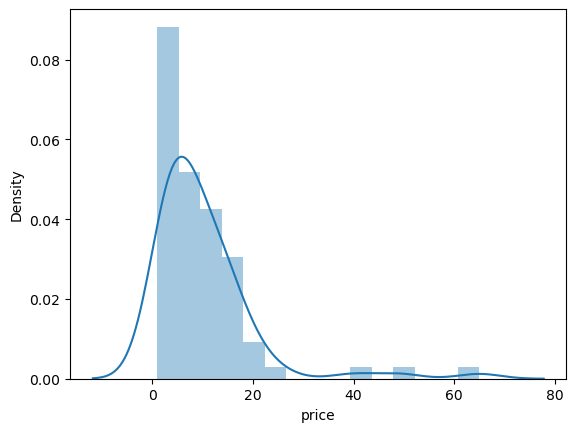

In [135]:
for i in a:
    sns.distplot(df[i])
    plt.show()

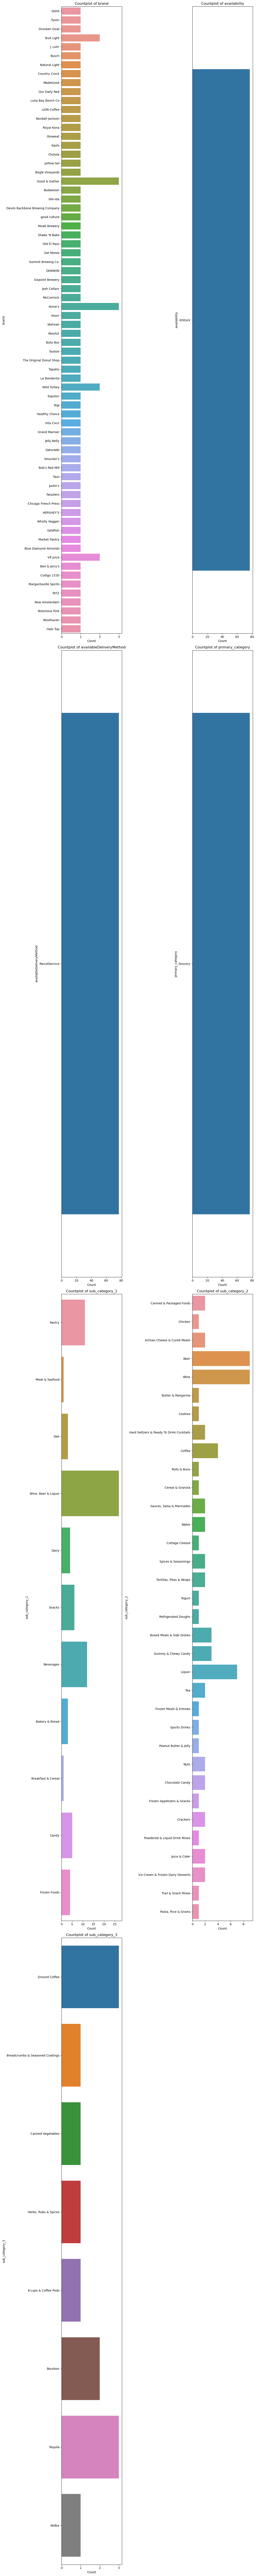

In [136]:
plt.figure(figsize=(12, 120))
plt.subplots_adjust(hspace=2.5)
for i, col in enumerate(['brand', 'availability', 'availableDeliveryMethod', 'primary_category', 'sub_category_1', 'sub_category_2', 'sub_category_3']):
    plt.subplot(4, 2, i+1)
    sns.countplot(data=df, y=col)
    plt.title(f'Countplot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [137]:
## Outliers

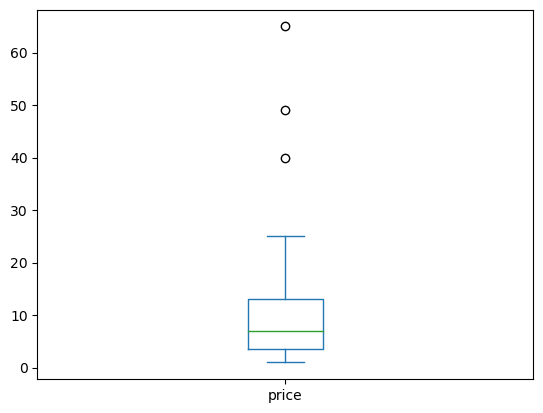

In [138]:
df.plot(kind='box')
plt.show()

In [139]:
## the outliers are less so we are not going to treat the outlier

In [140]:
## checking the null values

In [141]:
df.isnull().sum()

brand                       0
price                       0
availability                0
availableDeliveryMethod     0
primary_category            0
sub_category_1              0
sub_category_2              1
sub_category_3             64
mg  date                    0
expiry date                 0
dtype: int64

In [142]:
df['sub_category_2'].fillna('',inplace=True)
df['sub_category_3'].fillna('',inplace=True)

In [143]:
df.isnull().sum()

brand                      0
price                      0
availability               0
availableDeliveryMethod    0
primary_category           0
sub_category_1             0
sub_category_2             0
sub_category_3             0
mg  date                   0
expiry date                0
dtype: int64

In [144]:
df['availability']=df['availability'].map({'InStock':1,'Out of Stock': 0})
df['availableDeliveryMethod']=df['availableDeliveryMethod'].map({'ParcelService':1})
df['primary_category']=df['primary_category'].map({'Grocery':1})

In [145]:
label_encoder = LabelEncoder()

In [146]:
df['brand'] = label_encoder.fit_transform(df['brand'])
df['sub_category_1'] = label_encoder.fit_transform(df['sub_category_1'])
df['sub_category_2'] = label_encoder.fit_transform(df['sub_category_2'])
df['sub_category_3'] = label_encoder.fit_transform(df['sub_category_3'])

In [147]:
df

,brand,price,availability,availableDeliveryMethod,primary_category,sub_category_1,sub_category_2,sub_category_3,mg date,expiry date
0,19,3.29,1,1,1,8,5,0,2022-06-12,2022-08-12
1,62,10.39,1,1,1,7,7,0,2022-06-12,2022-08-12
2,17,9.39,1,1,1,5,1,0,2022-06-12,2022-12-12
3,7,17.99,1,1,1,10,2,0,2022-06-12,2024-06-12
4,28,12.99,1,1,1,10,33,0,2022-06-12,2024-06-12
...,...,...,...,...,...,...,...,...,...,...
72,45,15.99,1,1,1,10,33,0,2022-06-12,2024-06-12
73,22,2.79,1,1,1,8,21,0,2022-06-12,2022-08-12
74,51,9.99,1,1,1,10,33,0,2022-06-12,2024-06-12
75,25,4.99,1,1,1,6,17,0,2022-06-12,2022-06-12


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   brand                    77 non-null     int32         
 1   price                    77 non-null     float64       
 2   availability             77 non-null     int64         
 3   availableDeliveryMethod  77 non-null     int64         
 4   primary_category         77 non-null     int64         
 5   sub_category_1           77 non-null     int32         
 6   sub_category_2           77 non-null     int32         
 7   sub_category_3           77 non-null     int32         
 8   mg  date                 77 non-null     datetime64[ns]
 9   expiry date              77 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int32(4), int64(3)
memory usage: 4.9 KB


In [149]:
## Lets check the correlation between Independent variable

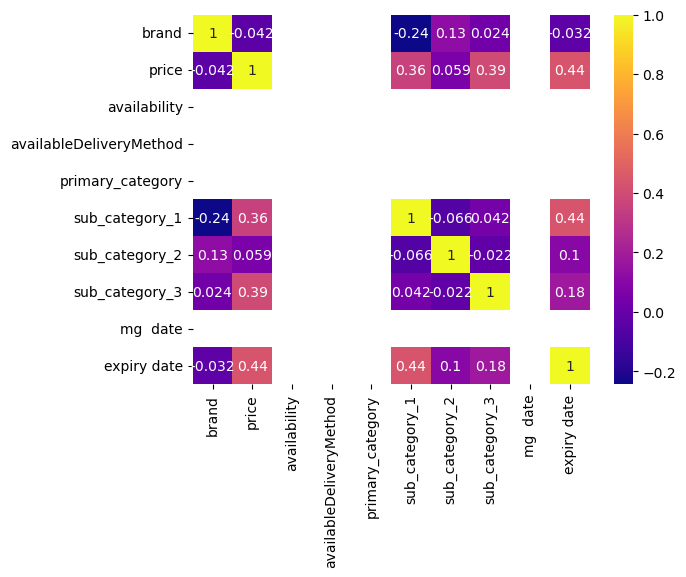

In [150]:
sns.heatmap(df.corr(),annot=True,cmap="plasma")
plt.show()

In [151]:
## Feature Engineering

In [152]:
df['expiry_duration'] = (df['expiry date'] - df['mg  date']).dt.days

In [153]:
df['expiry_soon'] = (df['expiry_duration'] <= 30).astype(int)

In [154]:
df['days_until_expiry'] = (pd.to_datetime(df['expiry date']) - pd.to_datetime('today')).dt.days

In [155]:
## Linear Regression Model

In [156]:
X = df[['brand', 'price', 'availability', 'availableDeliveryMethod', 'primary_category', 'sub_category_1', 'sub_category_2', 'sub_category_3', 'days_until_expiry']]
y = df['expiry_soon']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = (model.predict(X_test) > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
print(f'Accuracy: {accuracy}')

Mean Absolute Error: 0.1875
Root Mean Squared Error: 0.4330127018922193
R-squared: 0.12727272727272732
Accuracy: 0.8125


Interpretation:
The accuracy is relatively high at 81.25%, indicating that the model performs well in terms of binary classification, the MAE, RMSE, and R-squared metrics suggest that the model's predictions are not extremely accurate or precise. There may be room for improvement, potentially by exploring other modeling techniques or optimizing the features and hyperparameters of the linear regression model.

In [158]:
## Logistic Regression:

In [159]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
mse_logistic = mean_squared_error(y_test, y_pred_logistic)
r2_logistic = r2_score(y_test, y_pred_logistic)

print(f'Logistic Regression Accuracy: {accuracy_logistic}')
print(f'Logistic Regression MSE: {mse_logistic}')
print(f'Logistic Regression R2 Score: {r2_logistic}')

Logistic Regression Accuracy: 0.9375
Logistic Regression MSE: 0.0625
Logistic Regression R2 Score: 0.7090909090909091


In [160]:
## Support vector Machine

In [161]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)


accuracy_svm = accuracy_score(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f'Support Vector Machine (SVM) Accuracy: {accuracy_svm}')
print(f'Support Vector Machine (SVM) MSE: {mse_svm}')
print(f'Support Vector Machine (SVM) R2 Score: {r2_svm}')


Support Vector Machine (SVM) Accuracy: 0.9375
Support Vector Machine (SVM) MSE: 0.0625
Support Vector Machine (SVM) R2 Score: 0.7090909090909091


In [162]:
## Random Forest Classifier

In [164]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Classifier Accuracy: {accuracy_rf}')
print(f'Random Forest Classifier MSE: {mse_rf}')
print(f'Random Forest Classifier R2 Score: {r2_rf}')

Random Forest Classifier Accuracy: 1.0
Random Forest Classifier MSE: 0.0
Random Forest Classifier R2 Score: 1.0


In [165]:
products_expiring_soon = X_test[y_pred_rf == 1]
print(products_expiring_soon)

    brand  price  availability  availableDeliveryMethod  primary_category  \
35     34   1.39             1                        1                 1   
47     67   4.29             1                        1                 1   
66      2   4.79             1                        1                 1   
53     55   3.49             1                        1                 1   
58     10  12.99             1                        1                 1   

    sub_category_1  sub_category_2  sub_category_3  days_until_expiry  
35               8               3               0               -653  
47               1              29               0               -653  
66               6              17               0               -638  
53               8              22               0               -651  
58               1               9               4               -646  


Interpretation:
The Random Forest Classifier model achieved a perfect accuracy of 1.0, MSE of 0.0 indicating no errors, and R2 score of 1.0 indicating perfect fit. These results suggest that the model performed exceptionally well on your test data and made accurate predictions for whether products are going to expire soon or not. However, it's important to ensure that the model is not overfitting to the training data and that these results generalize well to new, unseen data.